In [ ]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree 


In [ ]:
df = pd.read_csv("/content/us_tornado_1.csv")
df.head()

,yr,mo,dy,date,st,mag,inj,fat,slat,slon,elat,elon,len,wid
0,1950,1,3,1/3/1950,IL,3,3,0,39.10,-89.30,39.12,-89.23,3.6,130
1,1950,1,3,1/3/1950,MO,3,3,0,38.77,-90.22,38.83,-90.03,9.5,150
2,1950,1,3,1/3/1950,OH,1,1,0,40.88,-84.58,0.00,0.00,0.1,10
3,1950,1,13,1/13/1950,AR,3,1,1,34.40,-94.37,0.00,0.00,0.6,17
4,1950,1,25,1/25/1950,IL,2,0,0,41.17,-87.33,0.00,0.00,0.1,100


In [ ]:
# kiểm tra kích thước tập dữ liệu
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (67558, 14)


In [ ]:
# chuyển tên các cột theo thứ tự thành tên đầy đủ
col_names = ['year', 'month', 'day', 'date', 'state', 'damage', 'injuries', 'fatalities',
             'StartingLatitude', 'StartingLongitude', 'EndingLatitude', 'EndingLongitude', 'length ', 'width ']

df.columns = col_names

df.columns

Index(['year', 'month', 'day', 'date', 'state', 'damage', 'injuries',
       'fatalities', 'StartingLatitude', 'StartingLongitude', 'EndingLatitude',
       'EndingLongitude', 'length ', 'width '],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67558 entries, 0 to 67557
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               67558 non-null  int64  
 1   month              67558 non-null  int64  
 2   day                67558 non-null  int64  
 3   date               67558 non-null  object 
 4   state              67558 non-null  object 
 5   damage             67558 non-null  int64  
 6   injuries           67558 non-null  int64  
 7   fatalities         67558 non-null  int64  
 8   StartingLatitude   67558 non-null  float64
 9   StartingLongitude  67558 non-null  float64
 10  EndingLatitude     67558 non-null  float64
 11  EndingLongitude    67558 non-null  float64
 12  length             67558 non-null  float64
 13  width              67558 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 7.2+ MB


#Lấy các biến cần thiết

In [ ]:
# lấy ra các biến cần thiết
df_imp = df[['state','StartingLatitude','StartingLongitude','EndingLatitude','EndingLongitude','injuries','fatalities','damage']]

In [ ]:
# gom nhóm và chuyển đổi các giá trị cột damage:
# damage có mức độ yếu -9,0,1,2 thành <3
# damage có mức độ mạnh 3,4,5 thành >=3

df_imp['damage'] = df_imp['damage'].replace({-9: '<3', 0: '<3',1: '<3',2: '<3'})
df_imp['damage'] = df_imp['damage'].replace({3: '>=3', 4: '>=3',5: '>=3'})


<ipython-input-66-701d26de5100>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp['damage'] = df_imp['damage'].replace({-9: '<3', 0: '<3',1: '<3',2: '<3'})
<ipython-input-66-701d26de5100>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imp['damage'] = df_imp['damage'].replace({3: '>=3', 4: '>=3',5: '>=3'})


In [ ]:
df_imp.head()

,state,StartingLatitude,StartingLongitude,EndingLatitude,EndingLongitude,injuries,fatalities,damage
0,IL,39.10,-89.30,39.12,-89.23,3,0,>=3
1,MO,38.77,-90.22,38.83,-90.03,3,0,>=3
2,OH,40.88,-84.58,0.00,0.00,1,0,<3
3,AR,34.40,-94.37,0.00,0.00,1,1,>=3
4,IL,41.17,-87.33,0.00,0.00,0,0,<3


In [ ]:
df_imp.isnull().sum()

state                0
StartingLatitude     0
StartingLongitude    0
EndingLatitude       0
EndingLongitude      0
injuries             0
fatalities           0
damage               0
dtype: int64

In [ ]:
# tách dữ liệu thành tập dữ liệu đầu vào X và đầu ra y
X = df_imp.drop(['damage'], axis=1)

y = df_imp['damage']

In [ ]:
#chia train test với tỉ lệ là 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# kiểm tra khích thước train, test
X_train.shape, X_test.shape

((47290, 7), (20268, 7))

In [ ]:
# biến phân loại của tập train
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['state']

In [ ]:
# kiểm tra có giá trị null không
X_train[categorical].isnull().sum()

state    0
dtype: int64

In [ ]:
# các biến cố của tập train
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['StartingLatitude',
 'StartingLongitude',
 'EndingLatitude',
 'EndingLongitude',
 'injuries',
 'fatalities']

In [ ]:
# kiểm tra có giá trị null không
X_train[numerical].isnull().sum()

StartingLatitude     0
StartingLongitude    0
EndingLatitude       0
EndingLongitude      0
injuries             0
fatalities           0
dtype: int64

In [ ]:
X_train[categorical].head()

,state
7360,KS
8210,SD
39146,FL
21602,OK
24363,NE


In [ ]:
# mã hóa biến phân loại với one-hot encoding
encoder = ce.OneHotEncoder(cols=['state'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
# xem tập train sau khi mã hóa
X_train.head()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,state_49,state_50,state_51,state_52,StartingLatitude,StartingLongitude,EndingLatitude,EndingLongitude,injuries,fatalities
7360,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,37.92,-97.42,0.00,0.00,0,0
8210,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,45.20,-100.30,0.00,0.00,0,0
39146,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,24.92,-80.63,24.92,-80.63,0,0
21602,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,35.22,-97.43,0.00,0.00,1,0
24363,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,40.72,-98.80,0.00,0.00,0,0


In [ ]:
X_train.shape

(47290, 58)

Có thể thấy sau khi mã hóa tập train đã tăng số dòng từ 7 lên 58 dòng



In [ ]:
X_test.head()

,state_1,state_2,state_3,state_4,state_5,state_6,state_7,state_8,state_9,state_10,...,state_49,state_50,state_51,state_52,StartingLatitude,StartingLongitude,EndingLatitude,EndingLongitude,injuries,fatalities
44086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,35.8800,-86.1000,35.9200,-86.0800,0,0
32153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,40.0300,-109.5300,0.0000,0.0000,0,0
56458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,29.8816,-92.1028,29.8945,-92.1004,0,0
30138,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,27.3000,-81.8500,0.0000,0.0000,0,0
54955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,38.5233,-89.0708,38.5278,-89.0675,0,0


In [ ]:
X_test.shape

(20268, 58)

Có thể thấy sau khi mã hóa tập train đã tăng số dòng từ 7 lên 58 dòng




#Feature scaling

In [ ]:
# gán các cột tập train vào biến cols
cols = X_train.columns

In [ ]:
cols

Index(['state_1', 'state_2', 'state_3', 'state_4', 'state_5', 'state_6',
       'state_7', 'state_8', 'state_9', 'state_10', 'state_11', 'state_12',
       'state_13', 'state_14', 'state_15', 'state_16', 'state_17', 'state_18',
       'state_19', 'state_20', 'state_21', 'state_22', 'state_23', 'state_24',
       'state_25', 'state_26', 'state_27', 'state_28', 'state_29', 'state_30',
       'state_31', 'state_32', 'state_33', 'state_34', 'state_35', 'state_36',
       'state_37', 'state_38', 'state_39', 'state_40', 'state_41', 'state_42',
       'state_43', 'state_44', 'state_45', 'state_46', 'state_47', 'state_48',
       'state_49', 'state_50', 'state_51', 'state_52', 'StartingLatitude',
       'StartingLongitude', 'EndingLatitude', 'EndingLongitude', 'injuries',
       'fatalities'],
      dtype='object')

In [ ]:
# chuẩn hóa dữ liệu trong khoảng (0,1) băng phương pháp RobustScaler
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

#Random Forest with 10 decision tree

In [ ]:
# tạo một phiên bản RF với n_estimators mặc định là 10
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9587


y_test là giá trị thật

y_pred là giá trị dự đoán

#Random Forest with 100 decision tree

In [ ]:
# instantiate the classifier with 100 decision tree
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9587


In [ ]:
# # create the classifier with n_estimators = 100
# clf = RandomForestClassifier(n_estimators=100, random_state=0)

# # fit the model to the training set
# clf.fit(X_train, y_train)

In [ ]:
# xem các điểm đặc trưng

feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

injuries             0.235969
StartingLongitude    0.179811
StartingLatitude     0.174738
EndingLatitude       0.135774
EndingLongitude      0.133983
fatalities           0.102524
state_1              0.002502
state_6              0.002114
state_23             0.002019
state_8              0.001630
state_4              0.001621
state_10             0.001516
state_16             0.001489
state_19             0.001487
state_33             0.001449
state_11             0.001446
state_15             0.001325
state_18             0.001267
state_20             0.001228
state_31             0.001167
state_7              0.001054
state_28             0.001046
state_2              0.001017
state_5              0.001006
state_3              0.000996
state_26             0.000942
state_27             0.000917
state_17             0.000897
state_22             0.000836
state_32             0.000776
state_25             0.000734
state_35             0.000625
state_9              0.000477
state_43  

`injuries` là đặc trưng quan trọng 

`state_51` là đặc trưng ít quan trọng

In [ ]:
index_strings = [str(idx) for idx in feature_scores.index]

In [ ]:
# #Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=index_strings, data=df_imp)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# Xây dựng RF trên các đặc trung đã chọn

In [ ]:
# xóa đặc trưng ít quan trọng trong tập train và test
X_train = X_train.drop(['state_51'], axis=1)

X_test = X_test.drop(['state_51'], axis=1)


<ipython-input-93-b6484cffb114>:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_train = X_train.drop(['state_51'], axis=1)
<ipython-input-93-b6484cffb114>:4: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X_test = X_test.drop(['state_51'], axis=1)


In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)


# Predict on the test set results
y_pred = clf.predict(X_test)



# Check accuracy score 
print('Model accuracy score with state_51 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with state_51 variable removed : 0.9586


# Confusion matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[19155   142]
 [  697   274]]


<Axes: >

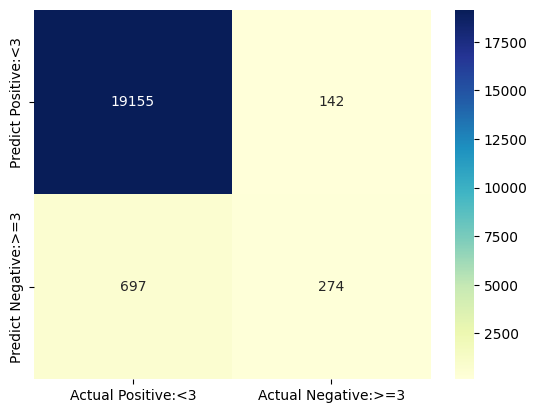

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive:<3', 'Actual Negative:>=3'], 
                                 index=['Predict Positive:<3', 'Predict Negative:>=3'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          <3       0.96      0.99      0.98     19297
         >=3       0.66      0.28      0.40       971

    accuracy                           0.96     20268
   macro avg       0.81      0.64      0.69     20268
weighted avg       0.95      0.96      0.95     20268

